# EDA with Python and applying Logistic Regression

We will be using the Titanic Dataset from Kaggle to perform the EDA. This is a very famous data and very often a student's first step in the Machine learning!.

This dataset is the semi-cleaned version of the titanic dataset. 

## Problem Statement

We will be trying to predict a **classification - Survival or Deceased.**

## Imporing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading dataset

In [2]:
train = pd.read_csv("titanic_train.csv")

In [3]:
train.head()

#SibSp - Count of Siblings and spouse
# Parch - count of parents and children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin the EDA. We will first start by checking the missing values in the dataset. 

## Feature Engineering - Identifying Missing data

We can use help of seaborn library to create a heatmap to see where we have missing data.

In [4]:
train.isnull() # Finds the NaN values

# True - means the data is null at that particular point.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Using Seaborn library to create a heatmap helps us to identify the null data.

<Axes: >

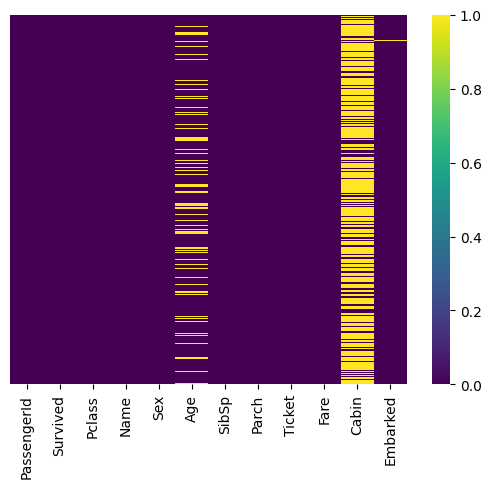

In [5]:
# yticklables - disabling the y-axis values (usually record numbers will be displayed)
# cmap - we can specify the style

sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

### Observations: 

- Roughly 20 percent of age data is missing. 
- The proportion of Age missing is likely small enough for  reasonable replacement with some form of imputation. 
- Cabin Data missing values are more, hence we will drop this column and change it to Cabin Known: 0 or 1.



#### Countplot

<Axes: xlabel='Survived', ylabel='count'>

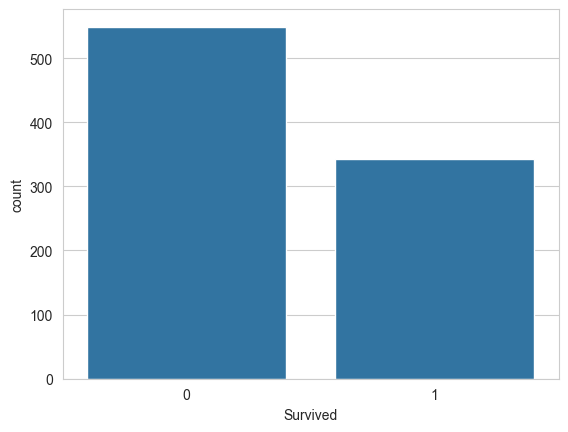

In [6]:
sns.set_style("whitegrid")
sns.countplot(x = train['Survived']) # Explicity specifying survived data on X-axis

#### Using Hue - Sex to categorize further

<Axes: xlabel='Survived', ylabel='count'>

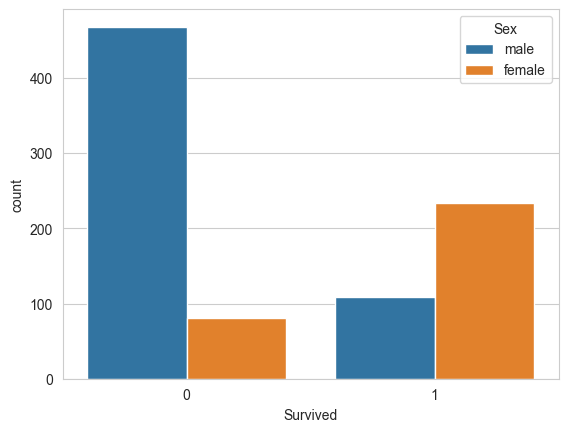

In [7]:
sns.set_style("whitegrid")
sns.countplot(x = train['Survived'], hue=train['Sex']) # Explicity specifying survived data on X-axis

Implicates that less male survived and more female survived.

#### Using Hue - Pclass (Passenger Class) to categorize further

<Axes: xlabel='Survived', ylabel='count'>

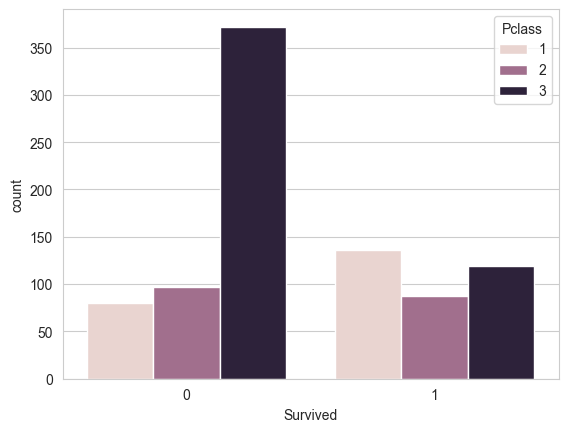

In [8]:
sns.set_style("whitegrid")
sns.countplot(x = train['Survived'], hue=train['Pclass']) # Explicity specifying survived data on X-axis

# Pclass - 1 (Rich class), 2 (Second class) and 3 (Ordinary class)

Passengers in Class 3 were not survived more.

#### Displot - Histogram

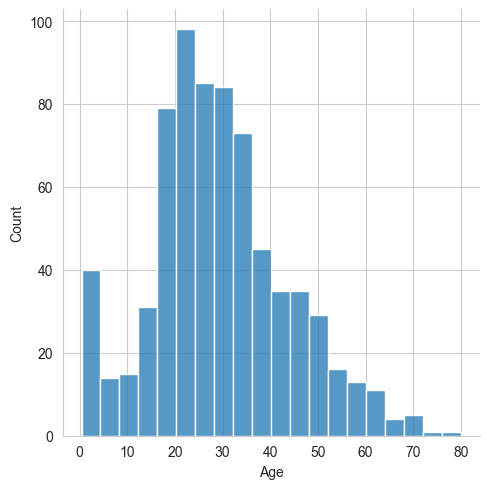

In [9]:
sns.displot(train['Age'].dropna(), kde=False) #dropna eliminates NA values

<Axes: xlabel='SibSp', ylabel='count'>

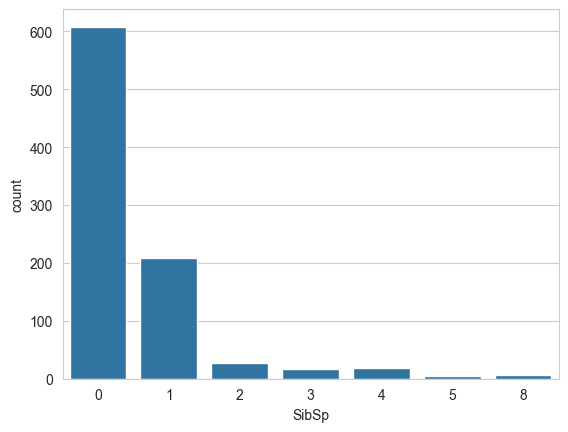

In [10]:
sns.countplot(x = train['SibSp'])

<Axes: xlabel='Fare', ylabel='count'>

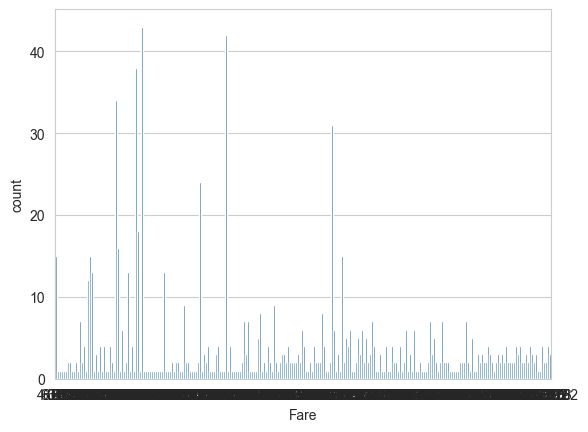

In [11]:
sns.countplot(x = train['Fare'].dropna())

## Data Cleaning

Removing Null values

/var/folders/46/93r9g3kj69s0c5zhwfq5y_s40000gn/T/ipykernel_2343/1459365069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train['Pclass'], y=train['Age'], palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

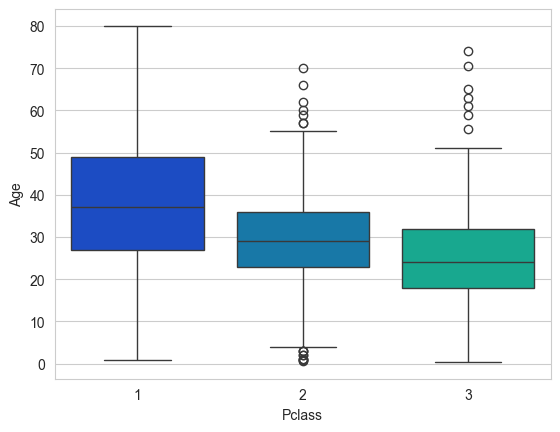

In [12]:
sns.boxplot(x=train['Pclass'], y=train['Age'], palette='winter')

#### Function to update age column 

As per the above boxplot, we can see for Pclass 1 the average age is near to 37. 

Similarly for Pclass 2 the average age is near to 29 and Pclass 3 its 24.

In [13]:
def impute_age(cols):

    Age, Pclass = cols[0], cols[1]

    if pd.isnull(Age):

        if Pclass == 1: return 37 

        elif Pclass == 2: return 29

        else: return 24

    else: 
        return Age

Applying the above function

In [14]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

/var/folders/46/93r9g3kj69s0c5zhwfq5y_s40000gn/T/ipykernel_2343/3433931814.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age, Pclass = cols[0], cols[1]


Now, let's check the heatmap again!

<Axes: >

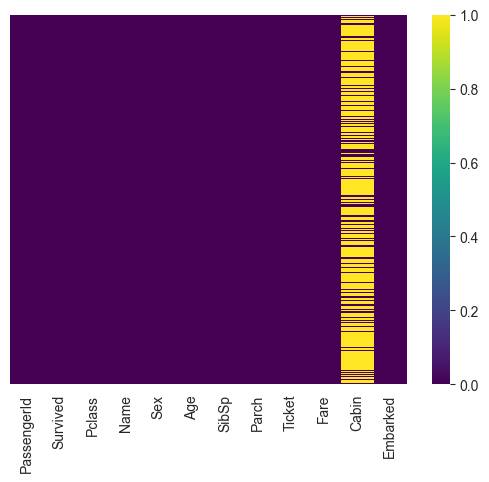

In [15]:
sns.heatmap(train.isnull(),cmap='viridis', yticklabels=False)

Let's drop the Cabin column as its complex to do the Feature engineering or to replace the missing values.

In [16]:
train.drop('Cabin', axis=1, inplace=True)

<Axes: >

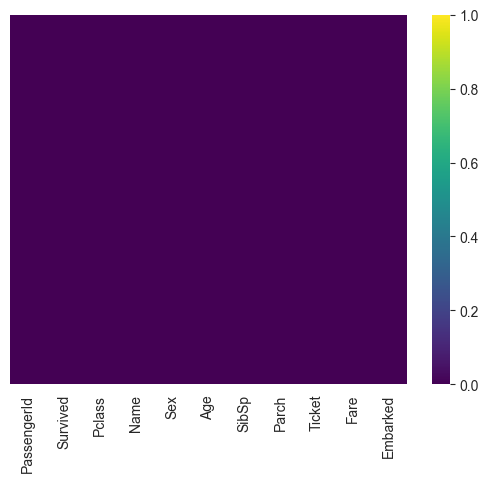

In [17]:
sns.heatmap(train.isnull(),cmap='viridis', yticklabels=False)

# As we can see there is no NaN values in the dataset now.

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features

Using `pd.get_dummies()` which creates columns based on the features.

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


Likewise as shown above, we will be converting the current Sex and Embarked columns

In [21]:
sex = pd.get_dummies(train['Sex'], drop_first=True).head()
embarked = pd.get_dummies(train['Embarked'], drop_first=True).head()

Dropping the original columns

In [22]:
train.drop(["Sex","Embarked","Name","Ticket"], axis=1, inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Let's concatenate the above create sex and embarked new columns in to the current dataframe.

In [24]:
train = pd.concat([train, sex, embarked], axis=1)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


<Axes: >

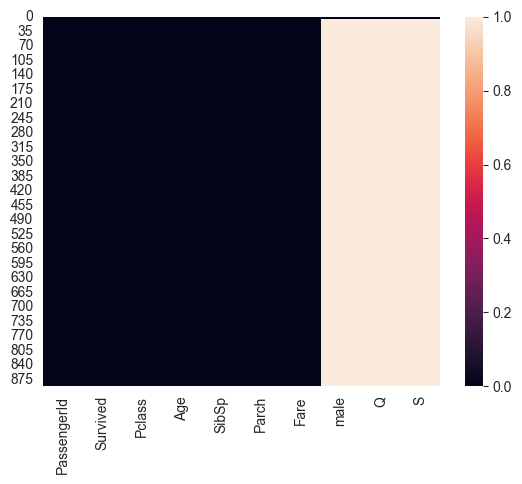

In [34]:
sns.heatmap(train.isnull())

Survived - Will be the dependent feature 

Remaining all are independent features.

## Building a Logistic Regression model

Lets split our data into Train and test.

Dropping the survived column as its the dependent variable that we need to predict.

In [26]:
train.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [27]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), 
                                                    train['Survived'], test_size=0.30,
                                                    random_state=101)

### Training and Predicting

In [30]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values